In [1]:
import numpy as np
import matplotlib.pyplot as plt
import neuro_evo
import mlutils
%matplotlib inline

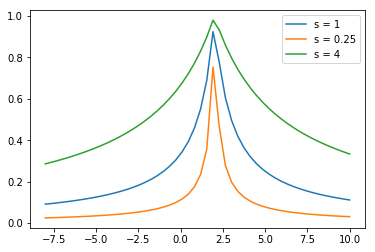

In [2]:
def output(x, s):
    return 1 / (1 + abs(x - 2)/abs(s))

n = 6;

nn = neuro_evo.NeuralNetwork([2,n,3])
    
x = np.linspace(-8, 10)
plt.plot(x, output(x, 1), label = "s = 1")
plt.plot(x, output(x, 0.25), label = "s = 0.25")
plt.plot(x, output(x, 4), label = "s = 4")
plt.legend();
#plt.savefig("izlaz.pdf");

In [3]:
f = open("zad7-dataset.txt", "r")
lines = f.readlines()
f.close()

xs = np.empty_like(lines, dtype=float)
ys = np.empty_like(lines, dtype=float)
labels = np.empty_like(lines, dtype=int)
target = np.empty((len(lines), 3), dtype=int)

for i, line in enumerate(lines):
    line = line[:-1]
    ss = line.split("\t")
    xs[i] = float(ss[0])
    ys[i] = float(ss[1])
    if ss[2] == "1":
        labels[i] = 0
        target[i,0] = 1
        target[i,1] = 0
        target[i,2] = 0
    elif ss[3] == "1":
        labels[i] = 1
        target[i,0] = 0
        target[i,1] = 1
        target[i,2] = 0
    else:
        labels[i] = 2
        target[i,0] = 0
        target[i,1] = 0
        target[i,2] = 1
        
f = open("labels.txt", "r")
lines = f.readlines()
f.close()

labels2 = np.empty_like(lines, dtype=int)

for i, line in enumerate(lines):
    line = line[:-1]
    labels2[i] = int(line)
        
X = np.empty((len(xs), 2))
dataset = []
for i, (x, y) in enumerate(zip(xs, ys)):
    X[i,0] = x
    X[i,1] = y
    dataset.append(([x, y], target[i]))
    
dataset = np.array(dataset)

f = open("params.txt", "r")
lines = f.readlines()
f.close()

params = np.empty_like(lines, dtype=float)
for i, line in enumerate(lines):
    line = line[:-1]
    params[i] = float(line)
    
#xs3 = np.empty((8), dtype=float)
#ys3 = np.empty((8), dtype=float)
#for i, (x, y) in enumerate(zip(xs.reshape((8,8)), ys.reshape((8,8)))):
#    xs3[i] = np.average(x)
#    ys3[i] = np.average(y)
    
f = open("stored_samples.txt", "r")
lines = f.readlines()
f.close()    

xs3 = np.empty((len(lines)), dtype=float)
ys3 = np.empty((len(lines)), dtype=float)
for i, line in enumerate(lines):
    line = line[:-1]
    x, y = line.split(" ")
    xs3[i] = float(x)
    ys3[i] = float(y)
    

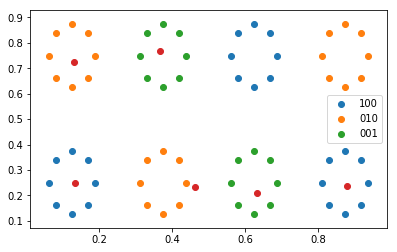

In [4]:
plt.figure(figsize=(6.4,4))

plt.scatter(xs[labels2==0], ys[labels2==0], label = "100")
plt.scatter(xs[labels2==1], ys[labels2==1], label = "010")
plt.scatter(xs[labels2==2], ys[labels2==2], label = "001")
plt.scatter(xs3, ys3)
plt.legend();

plt.savefig("scatter1.pdf");

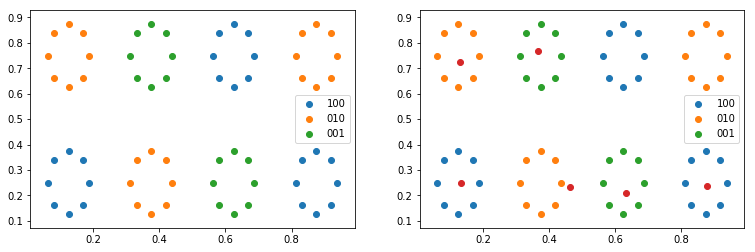

In [5]:
plt.figure(figsize=(2*6.4,4))

plt.subplot(1,2,1)
plt.scatter(xs[labels==0], ys[labels==0], label = "100")
plt.scatter(xs[labels==1], ys[labels==1], label = "010")
plt.scatter(xs[labels==2], ys[labels==2], label = "001")
plt.legend();

plt.subplot(1,2,2)
plt.scatter(xs[labels2==0], ys[labels2==0], label = "100")
plt.scatter(xs[labels2==1], ys[labels2==1], label = "010")
plt.scatter(xs[labels2==2], ys[labels2==2], label = "001")
plt.scatter(xs3, ys3)
plt.legend();

plt.savefig("scatter1.pdf");

In [6]:
np.set_printoptions(precision=3)

In [7]:
print(params[1:32:4])
print(params[3:32:4])

[ -7.111e-02   1.288e-01  -1.769e-01  -4.091e-02  -1.216e-01   1.255e-01
   4.282e+01   1.601e+01]
[  0.194  -0.356  -0.099  -0.184   0.077  -0.901 -23.795 -18.897]


In [8]:
print(params[0:32:4])
print(params[2:32:4])

[  0.366   0.132   0.462   0.13    0.879   0.634   0.725  35.924]
[  0.769   0.25    0.231   0.724   0.237   0.209 -71.042  -6.201]


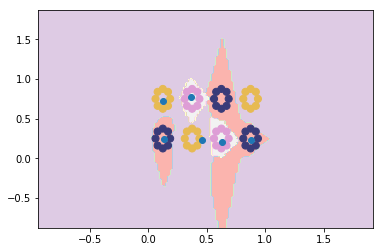

In [9]:
mlutils.plot_2d_clf_problem(X, labels2, lambda x : nn.predict2(x, params))
plt.scatter(xs3, ys3);
plt.savefig("plot_2d1.pdf");